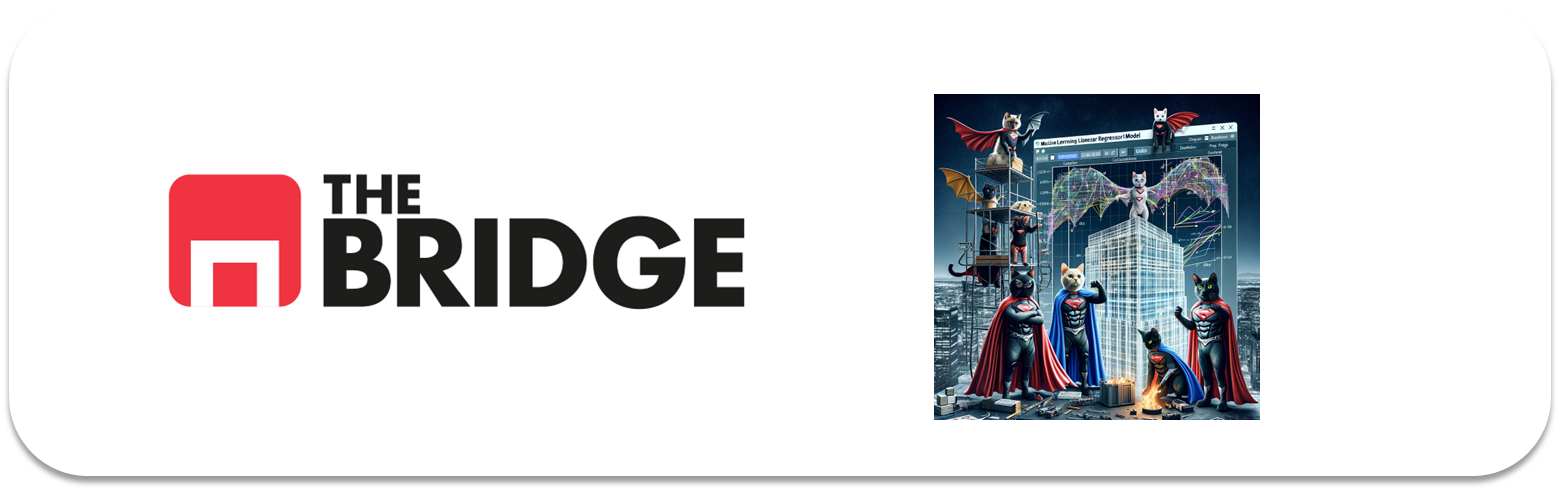

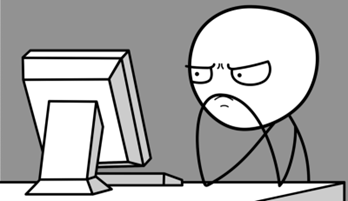

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logistica aplicada a Multiclase**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris


En este conjunto de ejercicios crearás un modelo para resolver un problema multiclase o multicategórico de clasificación, en concreto de clasificación de flores en función de una serie de características de las mismas (otro de esos famosos datasets de aprendizajes, el "iris" dataset)

### Ejercicio 1: Carga de Datos

Cargar el conjunto de datos Iris, que se encuentra dentro del módulo de datasets de `sklearn` (load_iris en sklearn.datasets). Repasa el ejercicio sobre "Diabetes" de la unidad anterior para saber como construir un dataframe de características y una variable con el target.

In [2]:
iris = load_iris(as_frame=True)
iris_df = iris.data
iris_df['target'] = iris.target

### Ejercicio 2



Muestra la info básica del dataset y sus primeras líneas. ¿Hay variables categóricas? Muestra el target y su distribución.

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


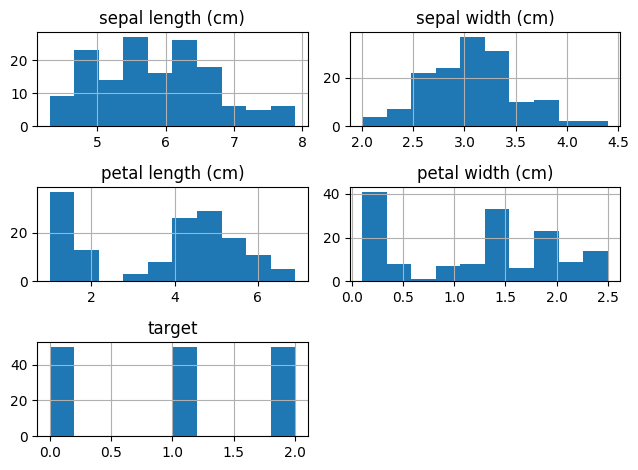

In [5]:
iris_df.hist()
plt.tight_layout()

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: xlabel='target', ylabel='count'>

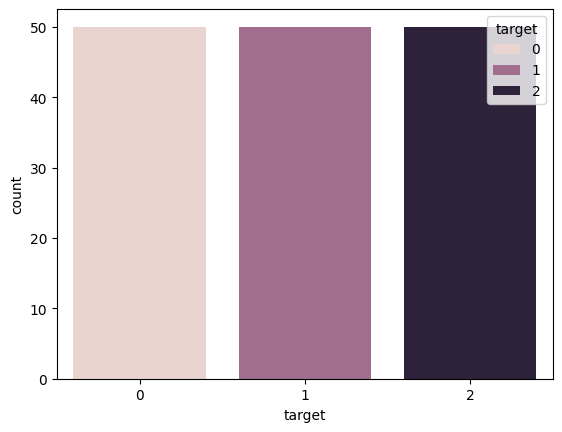

In [7]:
sns.countplot(x='target', data=iris_df, hue='target')

In [8]:
iris_df.target.value_counts(True)

0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64

### Ejercicio 3: Preparación de Datos

Divide el conjunto de datos en un 80% para entrenamiento y un 20% para pruebas (test). Crea el X_train, X_test, y_train e y_test. Normaliza las características para que tengan una media de 0 y una desviación estándar de 1. ?Qué tipo de escalado habrás hecho?

- Standardization

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop('target', axis=1), iris_df['target'], test_size=0.2, stratify=iris_df['target'], random_state=42)

In [10]:
y_train.value_counts(True)

0    0.333333
2    0.333333
1    0.333333
Name: target, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = iris_df.drop('target', axis=1).columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = iris_df.drop('target', axis=1).columns)

### Ejercicio 4: Entrenamiento del Modelo de Regresión Logística

Ahora que los datos están listos, es el momento de construir y entrenar tu modelo de regresión logística. Inicializa y entrenar un modelo de regresión logística utilizando el conjunto de entrenamiento (con tan pocos datos no es necesario que ajustes el hiperparámetro "max_iter")


In [12]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

### Ejercicio 5: Evaluación del train

Obtén las predicciones para el dataset de train y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_train = log_reg.predict(X_train)
conf_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred_train),
                           index=[f'Real {i}' for i in log_reg.classes_],
                           columns=[f'Prediction {i}' for i in log_reg.classes_])
conf_matrix

,Prediction 0,Prediction 1,Prediction 2
Real 0,40,0,0
Real 1,0,38,2
Real 2,0,3,37


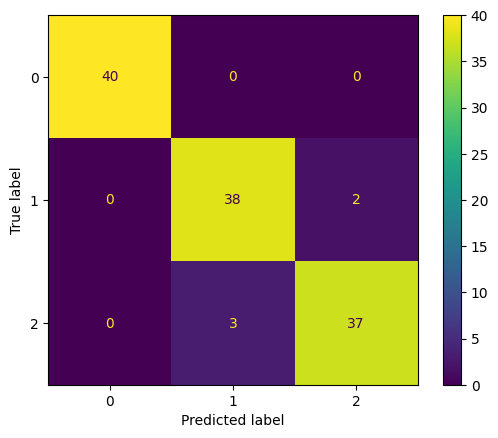

In [14]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)

<Axes: >

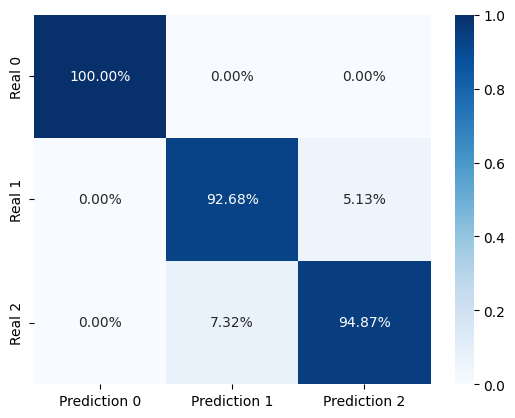

In [15]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [16]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.95      0.94        40
           2       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### Ejercicio 6: Evaluación del test

Obtén las predicciones para el dataset de test y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

In [17]:
y_pred_test = log_reg.predict(X_test)

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test),
                           index=[f'Real {i}' for i in log_reg.classes_],
                           columns=[f'Prediction {i}' for i in log_reg.classes_])
conf_matrix

,Prediction 0,Prediction 1,Prediction 2
Real 0,10,0,0
Real 1,0,9,1
Real 2,0,1,9


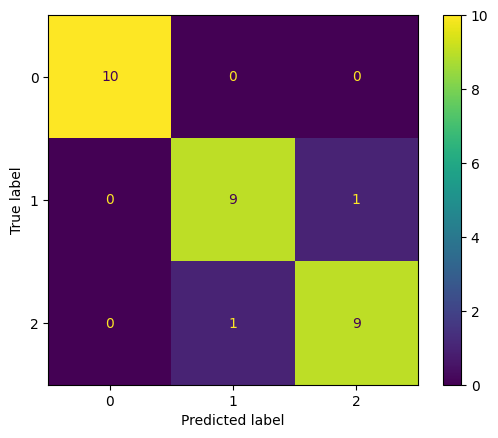

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

<Axes: >

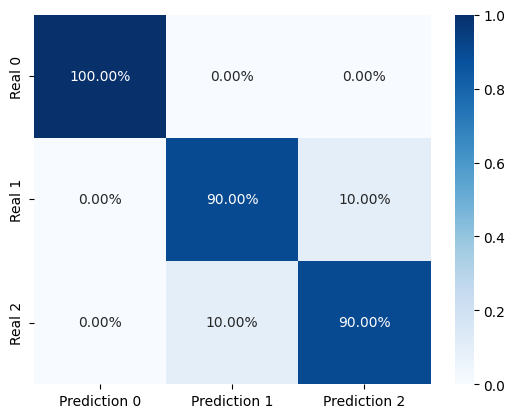

In [19]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),
            annot=True,
            fmt='.2%',
            cmap='Blues')

In [20]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Ejercicio 7: Interpretación de los coeficientes del modelo

Muestra los coeficientes para cada clasificador numéricamente


In [21]:
log_reg.coef_

array([[-1.08894494,  1.02420763, -1.79905609, -1.68622819],
       [ 0.53633654, -0.36048698, -0.20407418, -0.80795703],
       [ 0.5526084 , -0.66372065,  2.00313027,  2.49418523]])

### Ejercicio 8: Interpretación de los coeficientes del modelo (II)

Modifica la siguiente función y pinta los coeficientes obtenidos en el ejercicio anterior:

```python
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef
```

In [53]:
def show_coefs(model, figsize=(10, 5)):
    
    n_classes = model.coef_.shape[0]
    fig, ax = plt.subplots(n_classes, 2, figsize=figsize)


    for i, coefs in enumerate(model.coef_):
        df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

        df_coef.plot(kind="barh", ax=ax[i,0], legend=False)
        ax[i,0].set_title(f'Class {i}: Raw Coefficients')

        df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[i,1], legend=False)
        ax[i,1].set_title(f'Class {i}: Coefficients by Magnitude')

    fig.suptitle(f"Model Coefficients for each class in {model}")

    fig.tight_layout()

    return df_coef

,coefs
sepal length (cm),-1.088945
sepal width (cm),1.024208
petal length (cm),-1.799056
petal width (cm),-1.686228


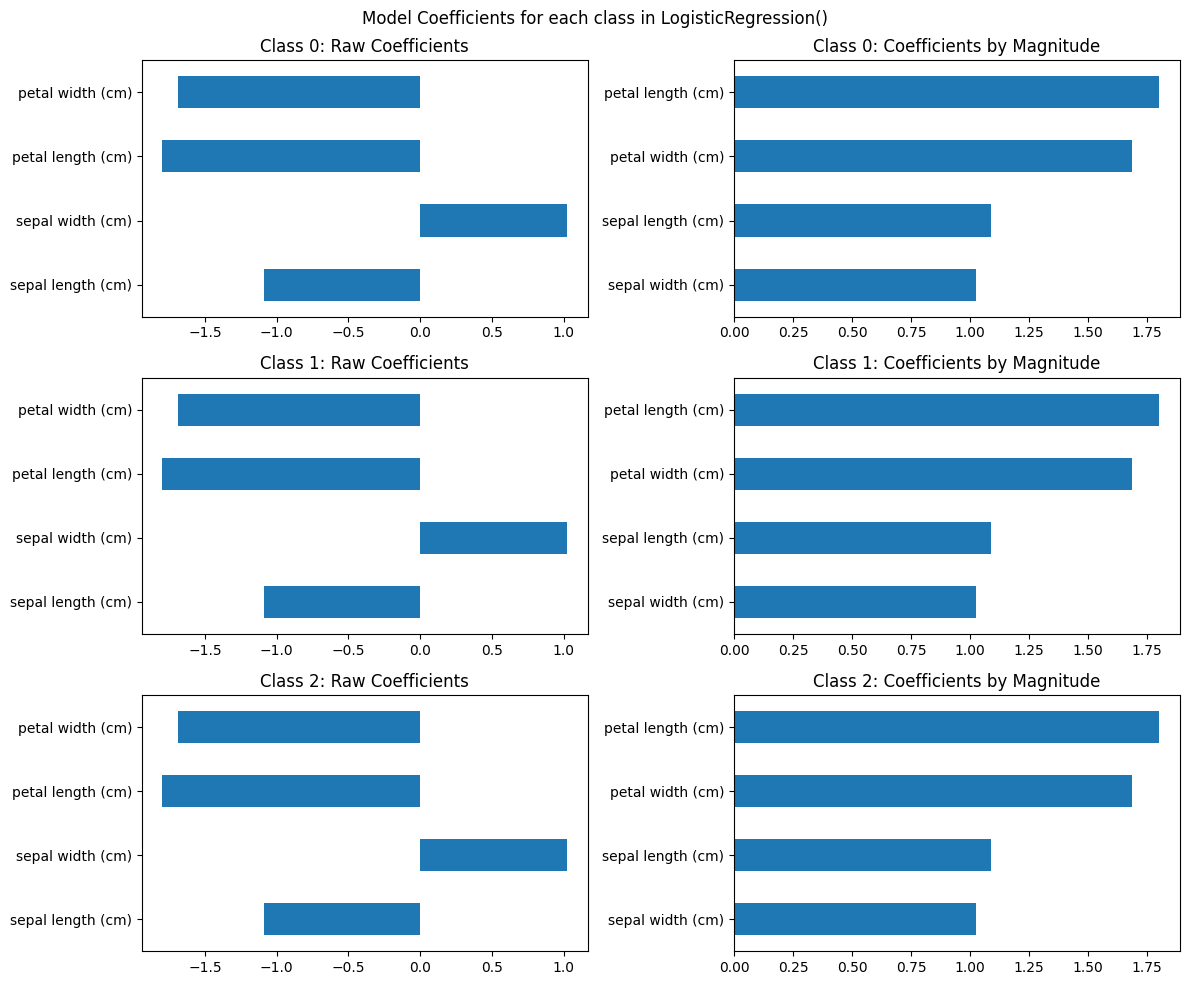

In [54]:
show_coefs(log_reg, figsize=(12,10))